# EXAMEN

### NOMBRE: MALKI YUPANKI
### FECHA: 20-12-2020

Objetivo:

    -	Consolidar los conocimientos adquiridos en clase para desarrollar simulaciones de eventos.

Introducción:

El golpe económico de la crisis sanitaria del corona virus no va a ser cosa de semanas, sino de meses. Dentro de una de las etapas importantes que están a la vuelta de la esquina son las elecciones presidenciales y asambleístas del Ecuador. Para ello se plantea realizar un sistema de regresión que permita identificar cual es la tendencia de los votos en base al manejo de las redes sociales (Twitter y/o Facebook) [1].

Las regresiones lineales pueden aprenden por sí mismos y en este caso obtener automáticamente esa “recta” que buscamos con la tendencia de predicción. Para hacerlo se mide el error con respecto a los puntos de entrada y el valor “Y” de salida real [3].

### DESARROLLO


primero procedemos a importar las librerias necesarias para el analisis de la informacion de facebook. para el examen tomaremos los datos de facebook.

In [ ]:
# Imports necesarios
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
from facebook_scraper import get_posts
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [2]:
posts = []
candidatos = ['yakuperezoficial','LassoGuillermo', 'AlvaroNoboaPonton' , 'JuanFernandoVelascoOficial']
print(len(candidatos))

4


In [3]:
for i in range(len(candidatos)):
    for post in get_posts(candidatos[i], pages=10):
        try:
            post['Word count'] = len(post['text'])
            post['candidato']=candidatos[i]
            posts.append(post)
        except:
            post['Word count'] = 0
fb_posts = pd.DataFrame(posts)

In [4]:
fb_posts

,post_id,text,post_text,shared_text,time,image,video,video_thumbnail,video_id,likes,comments,shares,post_url,link,user_id,images,Word count,candidato
0,3323645617775175,"Te invito a conocer mi historia, vengo del Ecu...","Te invito a conocer mi historia, vengo del Ecu...",,2020-12-18 17:14:25,None,https://video.fgye7-1.fna.fbcdn.net/v/t42.9040...,https://scontent.fgye7-1.fna.fbcdn.net/v/t15.5...,2862820253993582,2163,185,0,https://facebook.com/watch?v=2862820253993582,None,2069422096530873,[],181,yakuperezoficial
1,416013382875064,⭕️ EN VIVO | La caravana de la honestidad lleg...,⭕️ EN VIVO | La caravana de la honestidad lleg...,,2020-12-20 17:16:18,None,https://scontent.fgye7-1.fna.fbcdn.net/v/t66.3...,https://scontent.fgye7-1.fna.fbcdn.net/v/t15.1...,416013382875064,1158,1573,836,https://facebook.com/watch?v=416013382875064,http://www.yakuperez.com/,2069422096530873,[],231,yakuperezoficial
2,238824137589941,⭕️ EN VIVO | En minka llegamos al Cantón #Durá...,⭕️ EN VIVO | En minka llegamos al Cantón #Durá...,,2020-12-20 16:54:51,None,https://scontent.fgye7-1.fna.fbcdn.net/v/t66.3...,https://scontent.fgye7-1.fna.fbcdn.net/v/t15.5...,238824137589941,436,158,219,https://facebook.com/watch?v=238824137589941,http://www.yakuperez.com/,2069422096530873,[],214,yakuperezoficial
3,3324606037679133,Gracias de todo corazón a toda la gente bella ...,Gracias de todo corazón a toda la gente bella ...,,2020-12-19 23:24:29,https://scontent.fgye7-1.fna.fbcdn.net/v/t1.0-...,None,None,None,1106,50,0,https://facebook.com/story.php?story_fbid=3324...,None,2069422096530873,[https://scontent.fgye7-1.fna.fbcdn.net/v/t1.0...,229,yakuperezoficial
4,3324499161023154,Hemos disfrutado de una tarde con todos nuestr...,Hemos disfrutado de una tarde con todos nuestr...,,2020-12-19 20:17:01,https://scontent.fgye7-1.fna.fbcdn.net/v/t1.0-...,None,None,None,1053,46,0,https://facebook.com/story.php?story_fbid=3324...,None,2069422096530873,[https://scontent.fgye7-1.fna.fbcdn.net/v/t1.0...,340,yakuperezoficial
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
143,4118800661480452,#JFenMedios | Este jueves daré a conocer nuest...,#JFenMedios | Este jueves daré a conocer nuest...,,2020-11-18 20:51:46,None,https://video.fgye7-1.fna.fbcdn.net/v/t42.9040...,https://scontent.fgye7-1.fna.fbcdn.net/v/t15.5...,1778350012333669,102,5,0,https://facebook.com/watch?v=1778350012333669,None,128667927160432,[],245,JuanFernandoVelascoOficial
144,4117839694909882,#Loja celebra 200 años de independencia. Un ab...,#Loja celebra 200 años de independencia. Un ab...,,2020-11-18 12:37:02,https://scontent.fgye7-1.fna.fbcdn.net/v/t1.0-...,None,None,None,103,3,0,https://facebook.com/story.php?story_fbid=4117...,None,128667927160432,[https://scontent.fgye7-1.fna.fbcdn.net/v/t1.0...,175,JuanFernandoVelascoOficial
145,4115828875110964,"Miércoles 18 de noviembre, 07:00. Sigan mi ent...","Miércoles 18 de noviembre, 07:00. Sigan mi ent...",,2020-11-17 20:04:35,None,https://video.fgye7-1.fna.fbcdn.net/v/t42.9040...,https://scontent.fgye7-1.fna.fbcdn.net/v/t15.1...,2731415960465454,108,5,0,https://facebook.com/watch?v=2731415960465454,None,128667927160432,[],177,JuanFernandoVelascoOficial
146,4115202151840303,Hoy juega la Tri y la ilusión se nos pone a fl...,Hoy juega la Tri y la ilusión se nos pone a fl...,,2020-11-17 14:57:44,https://scontent.fgye7-1.fna.fbcdn.net/v/t1.0-...,None,None,None,509,10,0,https://facebook.com/story.php?story_fbid=4115...,None,128667927160432,[https://scontent.fgye7-1.fna.fbcdn.net/v/t1.0...,82,JuanFernandoVelascoOficial


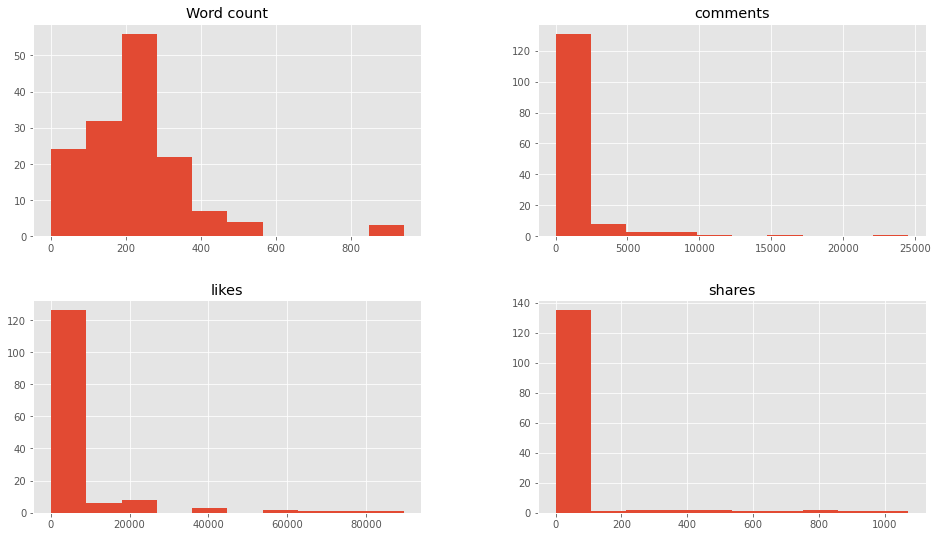

In [5]:
fb_posts.drop(['post_id','post_url', 'time'],1).hist()
plt.show()

realizamso el filtrado de los datos necesarios para el analisis de la informacion de cada candidato

In [26]:
filtered_data_c1 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 80000) & (fb_posts['candidato'] == 'yakuperezoficial')]
filtered_data_c2 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 80000) & (fb_posts['candidato'] == 'LassoGuillermo')]
filtered_data_c3 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 80000) & (fb_posts['candidato'] == 'AlvaroNoboaPonton')]
filtered_data_c4 = fb_posts[(fb_posts['Word count'] <= 3500) & (fb_posts['shares'] <= 80000) & (fb_posts['candidato'] == 'JuanFernandoVelascoOficial')]


luego graficamos las publicaciones de las personas en base al numero de palabras y los likes de cada publicacion.

In [42]:

colores=['orange','blue']
t=[30,60]


f1_c1 = filtered_data_c1['Word count'].values
f2_c1 = filtered_data_c1['likes'].values

f1_c2 = filtered_data_c2['Word count'].values
f2_c2 = filtered_data_c2['likes'].values


f1_c3 = filtered_data_c3['Word count'].values
f2_c3 = filtered_data_c3['likes'].values

f1_c4 = filtered_data_c4['Word count'].values
f2_c4 = filtered_data_c4['likes'].values

datos_candidatos = [filtered_data_c1,filtered_data_c2,filtered_data_c3,filtered_data_c4]
asignar=[]
asignar2=[]
asignar3=[]
asignar4=[]

for i in range(len(datos_candidatos)):
    if i == 0:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar.append(colores[0])
            else:
                asignar.append(colores[1])
    elif i == 1:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar2.append(colores[0])
            else:
                asignar2.append(colores[1])
    elif i == 2:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar3.append(colores[0])
            else:
                asignar3.append(colores[1])
    elif i == 3:
        for index, row in datos_candidatos[i].iterrows():
            if(row['Word count']>300):
                asignar4.append(colores[0])
            else:
                asignar4.append(colores[1])



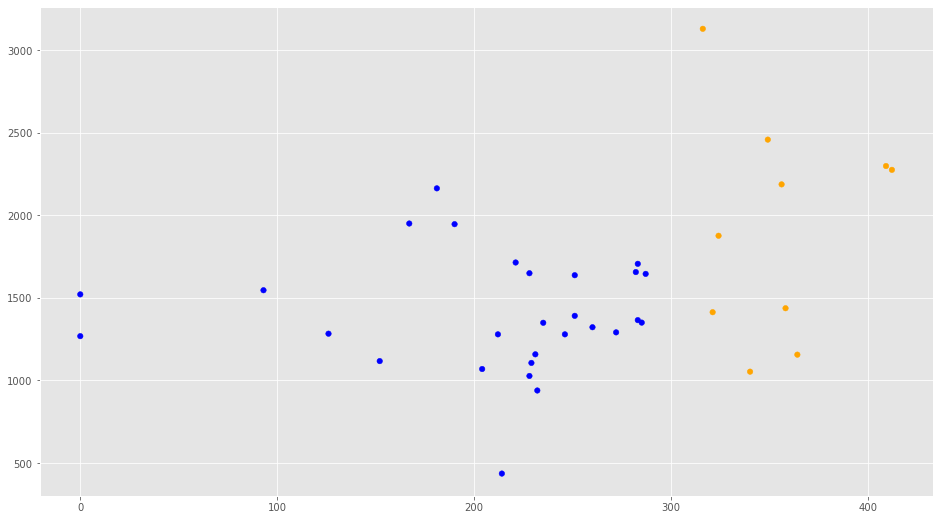

In [43]:
plt.scatter(f1_c1,f2_c1, c=asignar, s=t[0])
plt.show()

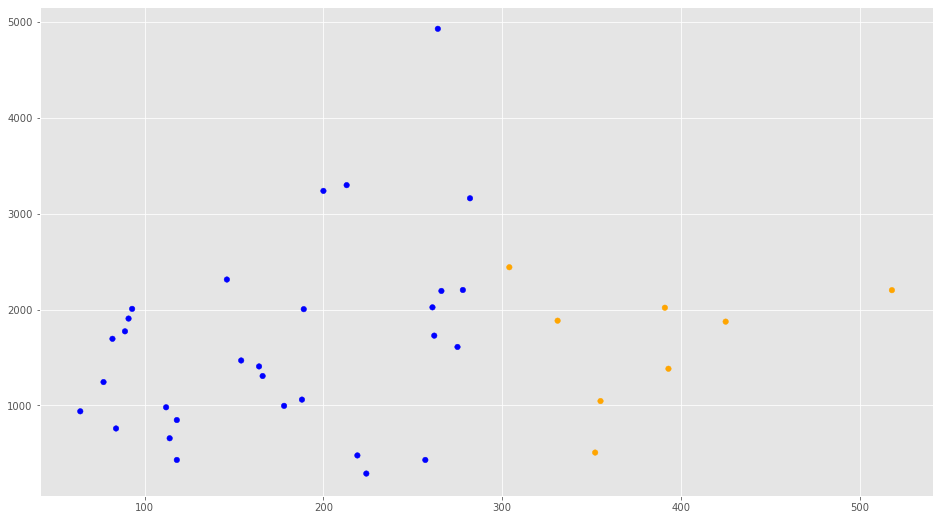

In [44]:
plt.scatter(f1_c2,f2_c2, c=asignar2, s=t[0])
plt.show()

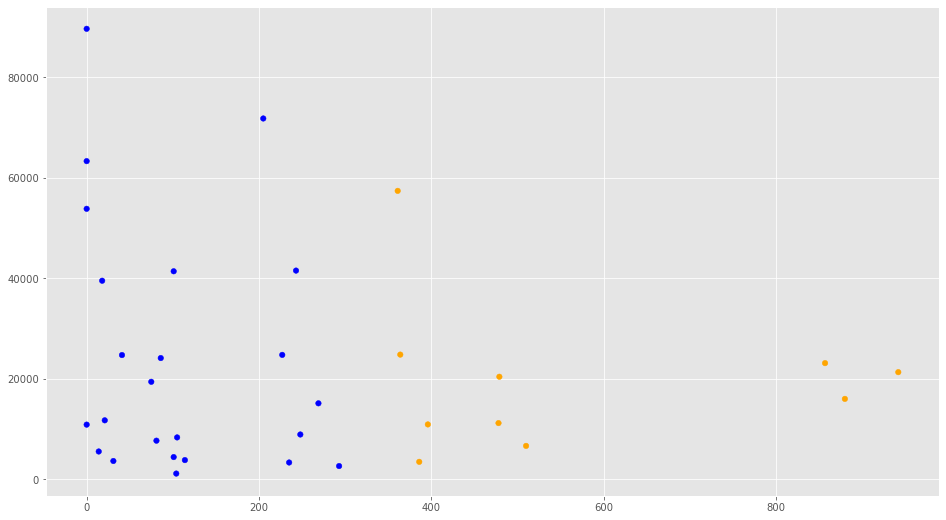

In [45]:
plt.scatter(f1_c3,f2_c3, c=asignar3, s=t[0])
plt.show()

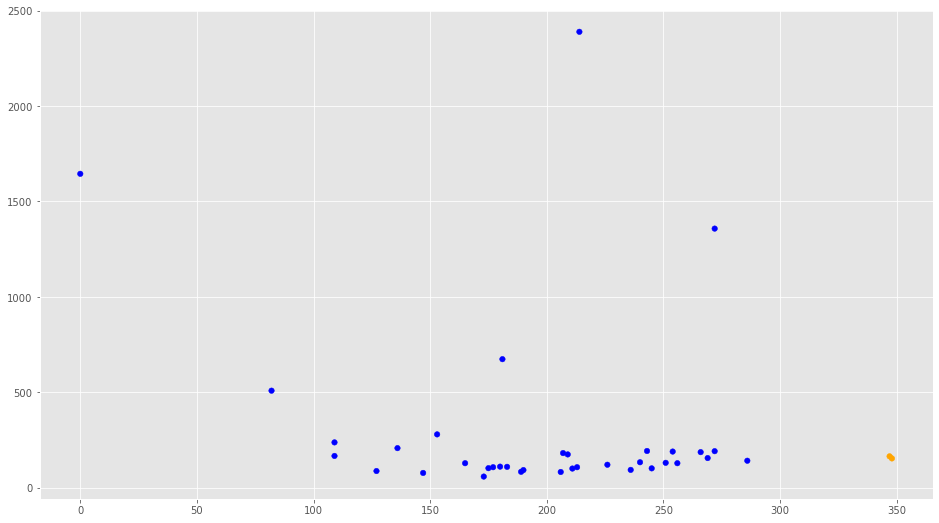

In [46]:
plt.scatter(f1_c4,f2_c4, c=asignar4, s=t[0])
plt.show()

Luego procedemos a relizar la regesion lineal en base a las publicaciones de los candidatos.

In [186]:
dataX_c1 =filtered_data_c1[["Word count"]]
X_train_c1 = np.array(dataX_c1)
y_train_c1 = filtered_data_c1['likes'].values

dataX_c2 =filtered_data_c2[["Word count"]]
X_train_c2 = np.array(dataX_c2)
y_train_c2 = filtered_data_c2['likes'].values

dataX_c3 =filtered_data_c3[["Word count"]]
X_train_c3 = np.array(dataX_c3)
y_train_c3 = filtered_data_c3['likes'].values

dataX_c4 =filtered_data_c4[["Word count"]]
X_train_c4 = np.array(dataX_c4)
y_train_c4 = filtered_data_c4['likes'].values
 
# Creamos el objeto de Regresión Linear
regr_c1 = linear_model.LinearRegression()
regr_c2 = linear_model.LinearRegression()
regr_c3 = linear_model.LinearRegression()
regr_c4 = linear_model.LinearRegression()
 
# Entrenamos nuestro modelo
regr_c1.fit(X_train_c1, y_train_c1)
regr_c2.fit(X_train_c2, y_train_c2)
regr_c3.fit(X_train_c3, y_train_c3)
regr_c4.fit(X_train_c4, y_train_c4)

 
# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred_c1 = regr_c1.predict(X_train_c1)
y_pred_c2 = regr_c1.predict(X_train_c2)
y_pred_c3 = regr_c1.predict(X_train_c3)
y_pred_c4 = regr_c1.predict(X_train_c4)
 
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coefficientes: \n', regr_c1.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('TERMINOS: \n', regr_c1.intercept_)
# Error Cuadrado Medio
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_c1, y_pred_c1))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('Variansa: %.2f' % r2_score(y_train_c1, y_pred_c1))

print("------------------------------------------------")

print('Coefficientes: \n', regr_c2.coef_)
print('TERMINOS: \n', regr_c2.intercept_)
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_c2, y_pred_c2))
print('Variansa: %.2f' % r2_score(y_train_c2, y_pred_c2))

print("------------------------------------------------")

print('Coefficientes: \n', regr_c3.coef_)
print('TERMINOS: \n', regr_c3.intercept_)
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_c3, y_pred_c3))
print('Variansa: %.2f' % r2_score(y_train_c3, y_pred_c3))

print("------------------------------------------------")

print('Coefficientes: \n', regr_c4.coef_)
print('TERMINOS: \n', regr_c4.intercept_)
print("ERROR MEDIO: %.2f" % mean_squared_error(y_train_c4, y_pred_c4))
print('Variansa: %.2f' % r2_score(y_train_c4, y_pred_c4))


Coefficientes: 
 [1.73913002]
TERMINOS: 
 1108.160286000026
ERROR MEDIO: 219977.60
Variansa: 0.10
------------------------------------------------
Coefficientes: 
 [1.97684449]
TERMINOS: 
 1219.3979286440413
ERROR MEDIO: 858757.69
Variansa: 0.02
------------------------------------------------
Coefficientes: 
 [-13.85523645]
TERMINOS: 
 26192.015565571313
ERROR MEDIO: 932688374.06
Variansa: -0.96
------------------------------------------------
Coefficientes: 
 [-1.44331929]
TERMINOS: 
 588.1945924392598
ERROR MEDIO: 1624534.93
Variansa: -6.34


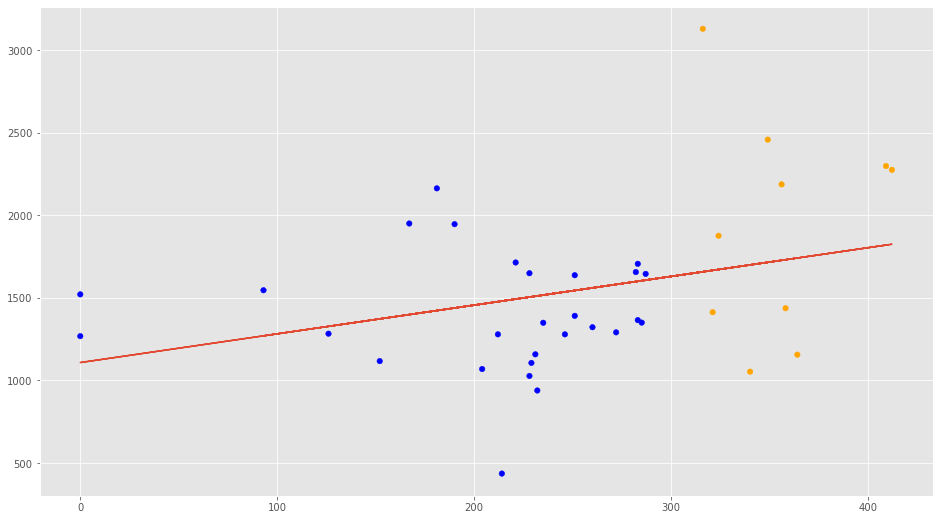

In [52]:
plt.scatter(f1_c1, f2_c1, c=asignar, s=t[0])
plt.plot(X_train_c1,y_pred_c1)
plt.show()


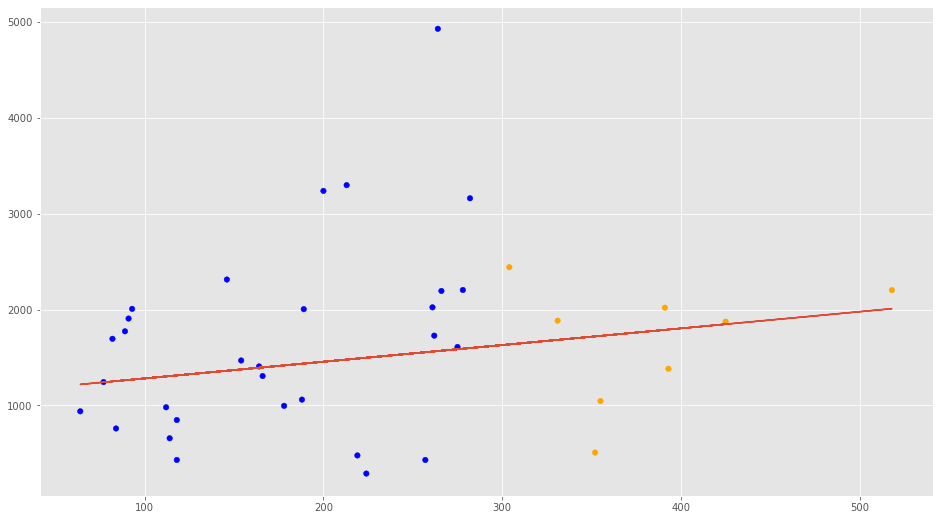

In [53]:
plt.scatter(f1_c2, f2_c2, c=asignar2, s=t[0])
plt.plot(X_train_c2,y_pred_c2)
plt.show()

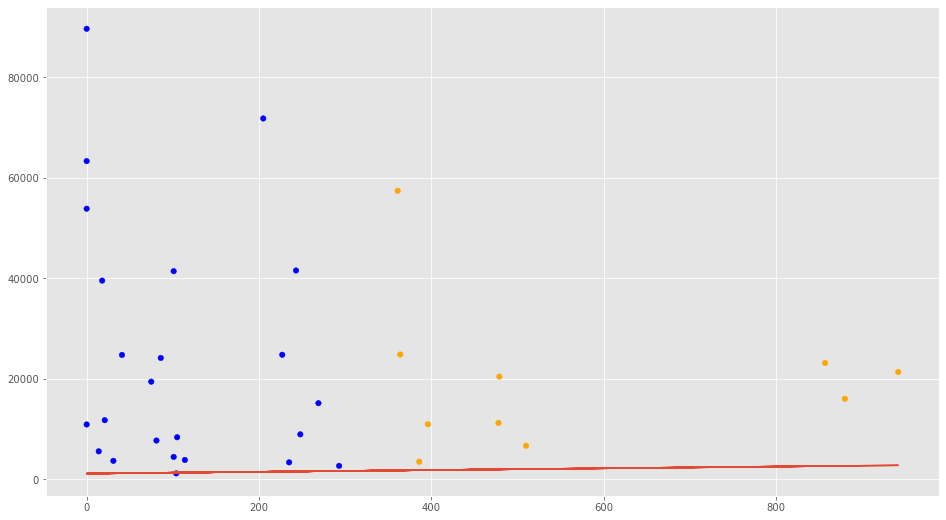

In [54]:
plt.scatter(f1_c3, f2_c3, c=asignar3, s=t[0])
plt.plot(X_train_c3,y_pred_c3)
plt.show()

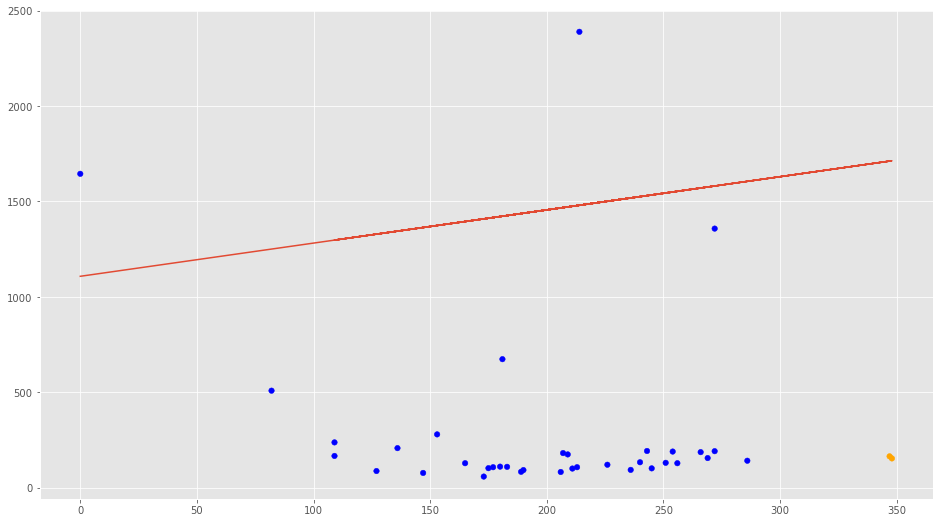

In [55]:
plt.scatter(f1_c4, f2_c4, c=asignar4, s=t[0])
plt.plot(X_train_c4,y_pred_c4)
plt.show()

Para tener una aproximacion mas clara de los datos procedemos a realizar una prediccion mas aproximada realizamos una regresion polinomial. 

In [97]:
filtered_data_c1[["Word count"]]
x = list(filtered_data_c1[["Word count"]].values)
y = list(filtered_data_c1[["likes"]].values)
z = max(filtered_data_c1)
print(max(x))

[412]


In [98]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

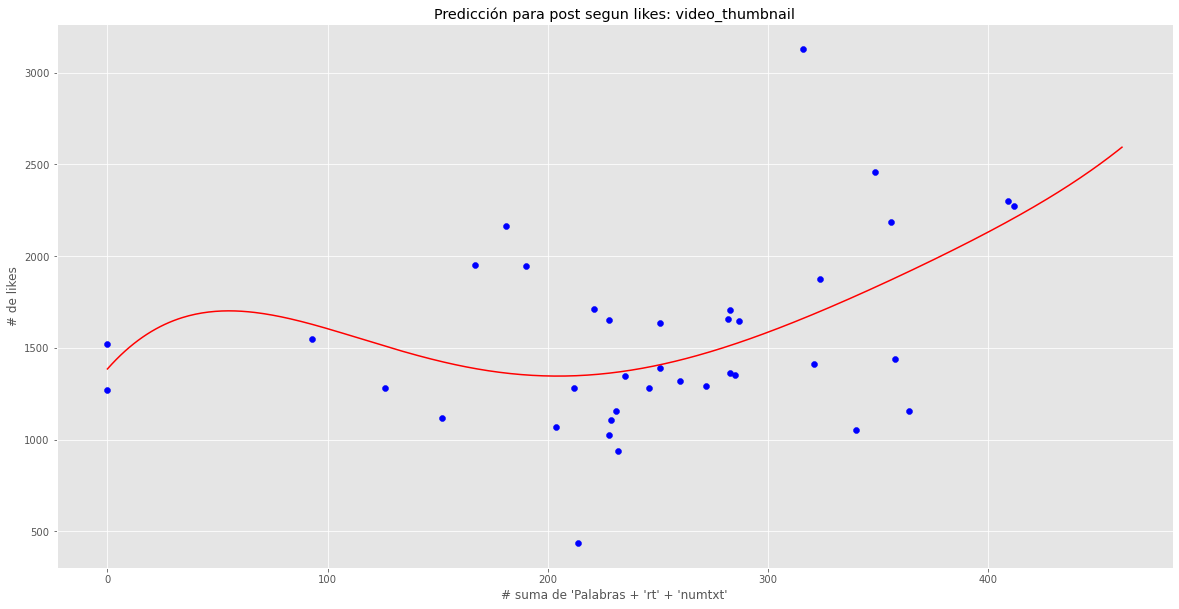

In [99]:
puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción para post segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()

In [100]:
filtered_data_c2[["Word count"]]
x = list(filtered_data_c2[["Word count"]].values)
y = list(filtered_data_c2[["likes"]].values) 
z = max(filtered_data_c2)
print(max(x))

[518]


In [101]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

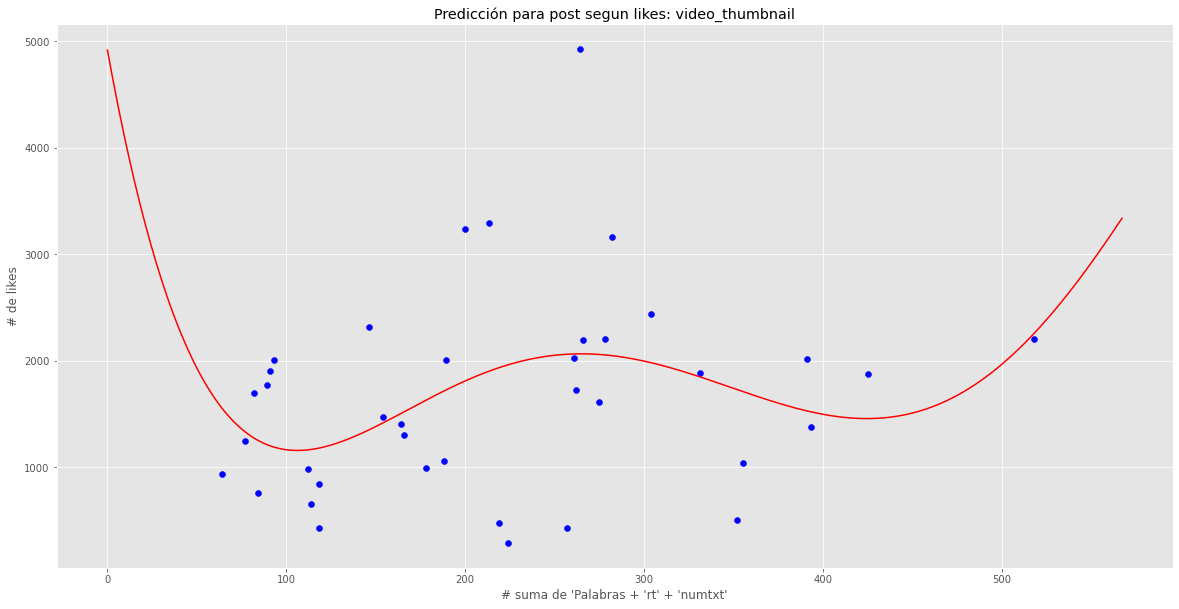

In [102]:
puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción para post segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()

In [103]:
filtered_data_c3[["Word count"]]
x = list(filtered_data_c3[["Word count"]].values)
y = list(filtered_data_c3[["likes"]].values) 
z = max(filtered_data_c3)
print(max(x))

[942]


In [104]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

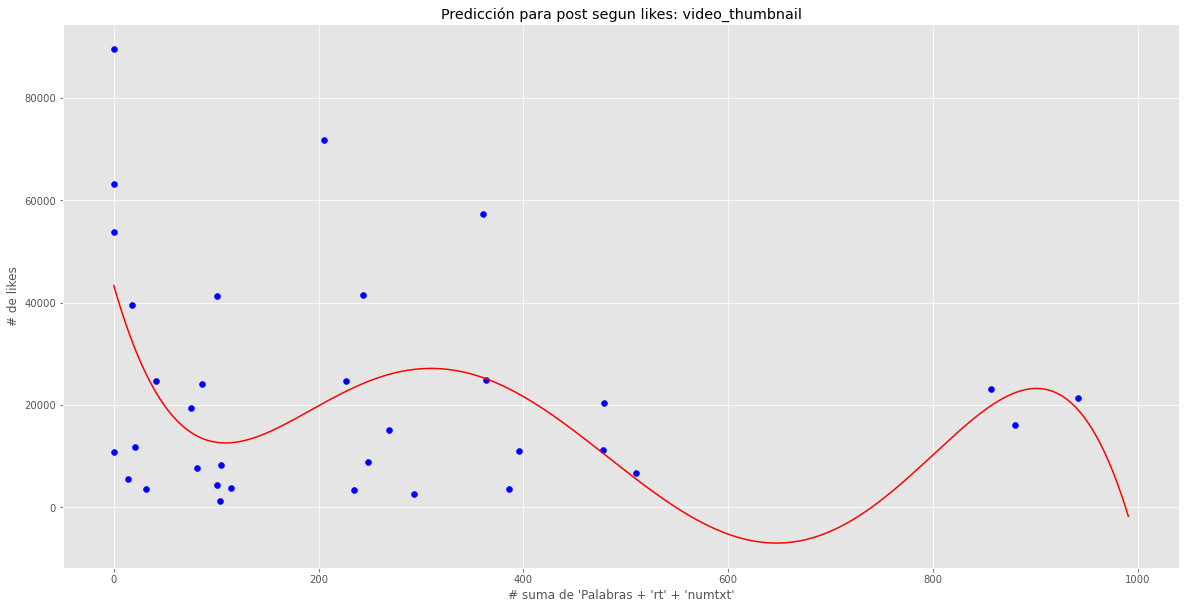

In [105]:
puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción para post segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()

In [108]:
filtered_data_c4[["Word count"]]
x = list(filtered_data_c4[["Word count"]].values) 
y = list(filtered_data_c4[["likes"]].values)
z = max(filtered_data_c4)
print(max(x))

[348]


In [109]:
pf = PolynomialFeatures(degree = 5)
X = pf.fit_transform(np.array(x).reshape(-1, 1))
regresion_lineal = LinearRegression()
regresion_lineal.fit(X, y) 
pred_x = list(range(0,int(max(x))+50))

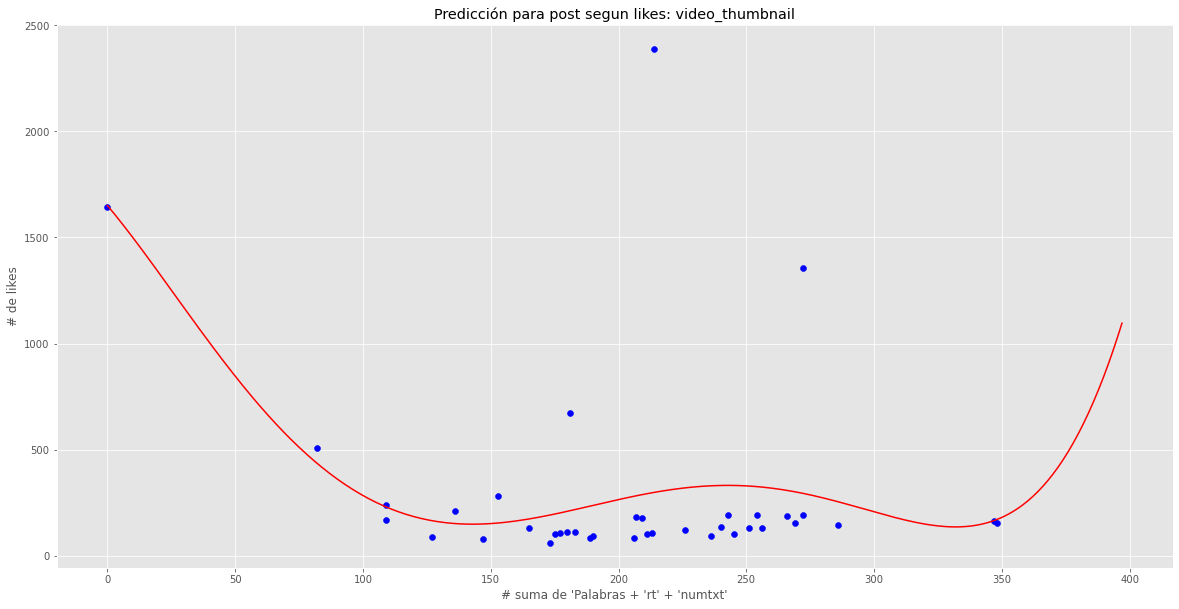

In [110]:
puntos = pf.fit_transform(np.array(pred_x).reshape(-1, 1))
prediccion_entrenamiento = regresion_lineal.predict(puntos)
plt.figure(figsize=(20,10))
plt.title('Predicción para post segun likes: ' + str(z))
plt.plot(pred_x, prediccion_entrenamiento, color='red')
plt.scatter(x,y,label="Datos Reales",color="blue")
plt.xlabel("# suma de 'Palabras + 'rt' + 'numtxt'")
plt.ylabel("# de likes")
plt.show()

In [111]:

# predecir cuántos "likes" voy a obtener por un post
y_Dosmil = regr_c1.predict([[305]])
print(int(y_Dosmil))

1638


In [112]:
suma = (filtered_data_c1["comments"].values + filtered_data_c1['shares'].values)
 
dataX2 =  pd.DataFrame()
dataX2["Word count"] = filtered_data_c1["Word count"]
dataX2["suma"] = suma
XY_train = np.array(dataX2)
z_train = filtered_data_c1['likes'].values

In [93]:
# Creamos un nuevo objeto de Regresión Lineal
regr2 = linear_model.LinearRegression()
 
# Entrenamos el modelo, esta vez, con 2 dimensiones
# obtendremos 2 coeficientes, para graficar un plano
regr2.fit(XY_train, z_train)
 
# Hacemos la predicción con la que tendremos puntos sobre el plano hallado
z_pred = regr2.predict(XY_train)
 
# Los coeficientes
print('Coefficients: \n', regr2.coef_)
# Error cuadrático medio
print("Mean squared error: %.2f" % mean_squared_error(z_train, z_pred))
# Evaluamos el puntaje de varianza (siendo 1.0 el mejor posible)
print('Variance score: %.2f' % r2_score(z_train, z_pred))

Coefficients: 
 [2.24452102 0.15677288]
Mean squared error: 210611.16
Variance score: 0.14


In [114]:
z_Dosmil = regr2.predict([[305, 100+4]])
print(int(z_Dosmil))

1609


#### SIMULACION

Para la simulacion de una votacion procedemos a realizarlo en base a la informacion que tenemos en la pagina:
https://www.primicias.ec/noticias/politica/nuevos-recintos-evitar-aglomeraciones-elecciones/


In [189]:
import simpy
import random
import matplotlib.pyplot as pp
import numpy as np
import math

%matplotlib inline

# PARAMETROS
RECINTOS = 270
RECINTO_MESAS_H = 24
RECINTO_MESAS_M = 24

AUSENTES_PROM = 400
TENDENCIA = 9
MESAS_DISPONIBLES = 48
TIEMPO_VOTACION = 5
DURACION_VOTACION = 24

# Diccionario para almacenar los resultados
numero_votos_totales = {}
votos_nulos = {}
no_vota = {}


class Recinto(object):
    # constructor
    def __init__(self, env, num_mesas, name):
        self.env = env
        self.num_cama = num_mesas
        self.camas = simpy.Resource(env, num_mesas)
        self.name = name

    def ingresar_persona(self, persona):
        yield self.env.timeout(random.randint(TIEMPO_VOTACION - 5, TIEMPO_VOTACION + 5))
        print(
            "La persona termino de votar: ", persona, " tiempo de salida: ", self.env.now, " RECINTO ", self.name)


def llegada_persona(env, recinto, persona):
    arrive = env.now
    estado = random.randint(1, 100)
    if (estado < 60):
        with recinto.camas.request() as mesa:
            tiempo_espera = random.randint(1,
                                           5)
            requerimiento = yield mesa | env.timeout(tiempo_espera)
            wait = env.now - arrive
            if mesa in requerimiento:
                print("Persona: ", persona, " esta en el ", " recinto ", recinto.name)
                yield env.process(recinto.ingresar_persona(persona))
                estado = random.randint(1, 100)
                if (estado < 8):
                    votos_nulos[env.now] = votos_nulos[
                                               env.now] + 1 if env.now in votos_nulos else 1
                else:
                    numero_votos_totales[env.now] = numero_votos_totales[
                                                        env.now] + 1 if env.now in numero_votos_totales else 1
            else:
                print("La persona ", persona, " esta indecisa ", recinto.name, " espero votar ", wait,
                      " en blanco")
                votos_nulos[env.now] = votos_nulos[env.now] + 1 if env.now in votos_nulos else 1
    else:
        no_vota[env.now] = no_vota[env.now] + 1 if env.now in no_vota else 1
        print("NO VOTA : ", persona, " RECINTO ", recinto.name)


def votar(env, tasa_crecimiento, inval, num_recintos):
    recintos = []
    for i in range(num_recintos):
        name = "REC" + str(i)
        recintos.append(Recinto(env, RECINTO_MESAS_H, str(name)))
    for i in range(inval):
        asignar_recinto(env, i, recintos)
    persona = inval
    while True:
        yield env.timeout(1)
        for i in range(tasa_crecimiento):
            persona += 1
            asignar_recinto(env, persona, recintos)


def asignar_recinto(env, persona, recintos):
    recint_asig = random.randint(1, 270)
    try:
        print("Llega persona : ", persona, " a Recinto ", env.now)
        env.process(llegada_persona(env, recintos[recint_asig], persona))
    except:
        print("Llega persona : ", persona, " a Recinto ", env.now)
        env.process(llegada_persona(env, recintos[0], persona))


print("Simulacion ELECCIONES 2020")
env = simpy.Environment()
env.process(votar(env, TENDENCIA, AUSENTES_PROM, RECINTOS))
env.run(until=DURACION_VOTACION)

print("Resultados VOTACION :")
print("VOTOS-VALIDOS: ")
tot = 0
for i in numero_votos_totales:
    r = int(i)
    tot = tot + r
print(tot)
print("NULOS: ")
falt = 0
for i in votos_nulos:
    r = int(i)
    falt = falt + r
print(math.ceil((falt * 10) / 100))
print("FALTANTES")
print(max(no_vota))
datos = sorted(numero_votos_totales.items())
x, y = zip(*datos)



Simulacion ELECCIONES 2020
Llega persona :  0  a Recinto  0
Llega persona :  1  a Recinto  0
Llega persona :  2  a Recinto  0
Llega persona :  3  a Recinto  0
Llega persona :  4  a Recinto  0
Llega persona :  5  a Recinto  0
Llega persona :  6  a Recinto  0
Llega persona :  7  a Recinto  0
Llega persona :  8  a Recinto  0
Llega persona :  9  a Recinto  0
Llega persona :  10  a Recinto  0
Llega persona :  11  a Recinto  0
Llega persona :  12  a Recinto  0
Llega persona :  13  a Recinto  0
Llega persona :  14  a Recinto  0
Llega persona :  15  a Recinto  0
Llega persona :  16  a Recinto  0
Llega persona :  17  a Recinto  0
Llega persona :  18  a Recinto  0
Llega persona :  19  a Recinto  0
Llega persona :  20  a Recinto  0
Llega persona :  21  a Recinto  0
Llega persona :  22  a Recinto  0
Llega persona :  23  a Recinto  0
Llega persona :  24  a Recinto  0
Llega persona :  25  a Recinto  0
Llega persona :  26  a Recinto  0
Llega persona :  27  a Recinto  0
Llega persona :  28  a Recinto 

Llega persona :  257  a Recinto  0
Llega persona :  258  a Recinto  0
Llega persona :  259  a Recinto  0
Llega persona :  260  a Recinto  0
Llega persona :  261  a Recinto  0
Llega persona :  262  a Recinto  0
Llega persona :  263  a Recinto  0
Llega persona :  264  a Recinto  0
Llega persona :  265  a Recinto  0
Llega persona :  266  a Recinto  0
Llega persona :  267  a Recinto  0
Llega persona :  268  a Recinto  0
Llega persona :  269  a Recinto  0
Llega persona :  270  a Recinto  0
Llega persona :  271  a Recinto  0
Llega persona :  272  a Recinto  0
Llega persona :  273  a Recinto  0
Llega persona :  274  a Recinto  0
Llega persona :  275  a Recinto  0
Llega persona :  276  a Recinto  0
Llega persona :  277  a Recinto  0
Llega persona :  278  a Recinto  0
Llega persona :  279  a Recinto  0
Llega persona :  280  a Recinto  0
Llega persona :  281  a Recinto  0
Llega persona :  282  a Recinto  0
Llega persona :  283  a Recinto  0
Llega persona :  284  a Recinto  0
Llega persona :  285

Persona:  136  esta en el   recinto  REC101
Persona:  137  esta en el   recinto  REC136
Persona:  140  esta en el   recinto  REC102
Persona:  141  esta en el   recinto  REC35
Persona:  142  esta en el   recinto  REC50
Persona:  143  esta en el   recinto  REC63
Persona:  144  esta en el   recinto  REC247
Persona:  149  esta en el   recinto  REC182
Persona:  150  esta en el   recinto  REC126
Persona:  153  esta en el   recinto  REC103
Persona:  155  esta en el   recinto  REC4
Persona:  157  esta en el   recinto  REC112
Persona:  158  esta en el   recinto  REC255
Persona:  159  esta en el   recinto  REC263
Persona:  161  esta en el   recinto  REC214
Persona:  162  esta en el   recinto  REC268
Persona:  164  esta en el   recinto  REC212
Persona:  165  esta en el   recinto  REC237
Persona:  167  esta en el   recinto  REC171
Persona:  169  esta en el   recinto  REC226
Persona:  171  esta en el   recinto  REC101
Persona:  176  esta en el   recinto  REC100
Persona:  178  esta en el   recinto  

La persona termino de votar:  427  tiempo de salida:  3  RECINTO  REC211
La persona termino de votar:  16  tiempo de salida:  4  RECINTO  REC102
La persona termino de votar:  35  tiempo de salida:  4  RECINTO  REC125
La persona termino de votar:  37  tiempo de salida:  4  RECINTO  REC117
La persona termino de votar:  39  tiempo de salida:  4  RECINTO  REC52
La persona termino de votar:  65  tiempo de salida:  4  RECINTO  REC88
La persona termino de votar:  73  tiempo de salida:  4  RECINTO  REC123
La persona termino de votar:  83  tiempo de salida:  4  RECINTO  REC199
La persona termino de votar:  117  tiempo de salida:  4  RECINTO  REC262
La persona termino de votar:  124  tiempo de salida:  4  RECINTO  REC94
La persona termino de votar:  143  tiempo de salida:  4  RECINTO  REC63
La persona termino de votar:  159  tiempo de salida:  4  RECINTO  REC263
La persona termino de votar:  176  tiempo de salida:  4  RECINTO  REC100
La persona termino de votar:  252  tiempo de salida:  4  RECIN

La persona termino de votar:  406  tiempo de salida:  7  RECINTO  REC80
La persona termino de votar:  407  tiempo de salida:  7  RECINTO  REC194
La persona termino de votar:  413  tiempo de salida:  7  RECINTO  REC250
Llega persona :  455  a Recinto  7
Llega persona :  456  a Recinto  7
Llega persona :  457  a Recinto  7
Llega persona :  458  a Recinto  7
Llega persona :  459  a Recinto  7
Llega persona :  460  a Recinto  7
Llega persona :  461  a Recinto  7
Llega persona :  462  a Recinto  7
Llega persona :  463  a Recinto  7
NO VOTA :  459  RECINTO  REC32
NO VOTA :  461  RECINTO  REC196
La persona termino de votar:  447  tiempo de salida:  7  RECINTO  REC199
La persona termino de votar:  448  tiempo de salida:  7  RECINTO  REC72
Persona:  455  esta en el   recinto  REC163
Persona:  456  esta en el   recinto  REC132
Persona:  457  esta en el   recinto  REC20
Persona:  458  esta en el   recinto  REC267
Persona:  460  esta en el   recinto  REC225
Persona:  462  esta en el   recinto  REC

La persona termino de votar:  302  tiempo de salida:  10  RECINTO  REC241
La persona termino de votar:  303  tiempo de salida:  10  RECINTO  REC23
La persona termino de votar:  327  tiempo de salida:  10  RECINTO  REC196
La persona termino de votar:  339  tiempo de salida:  10  RECINTO  REC140
La persona termino de votar:  344  tiempo de salida:  10  RECINTO  REC80
La persona termino de votar:  367  tiempo de salida:  10  RECINTO  REC241
La persona termino de votar:  408  tiempo de salida:  10  RECINTO  REC121
La persona termino de votar:  428  tiempo de salida:  10  RECINTO  REC265
La persona termino de votar:  442  tiempo de salida:  10  RECINTO  REC130
Llega persona :  482  a Recinto  10
Llega persona :  483  a Recinto  10
Llega persona :  484  a Recinto  10
Llega persona :  485  a Recinto  10
Llega persona :  486  a Recinto  10
Llega persona :  487  a Recinto  10
Llega persona :  488  a Recinto  10
Llega persona :  489  a Recinto  10
Llega persona :  490  a Recinto  10
NO VOTA :  4

Llega persona :  545  a Recinto  17
Llega persona :  546  a Recinto  17
Llega persona :  547  a Recinto  17
Llega persona :  548  a Recinto  17
Llega persona :  549  a Recinto  17
Llega persona :  550  a Recinto  17
Llega persona :  551  a Recinto  17
Llega persona :  552  a Recinto  17
Llega persona :  553  a Recinto  17
NO VOTA :  547  RECINTO  REC207
Persona:  545  esta en el   recinto  REC251
Persona:  546  esta en el   recinto  REC134
Persona:  548  esta en el   recinto  REC226
Persona:  549  esta en el   recinto  REC85
Persona:  550  esta en el   recinto  REC203
Persona:  551  esta en el   recinto  REC100
Persona:  552  esta en el   recinto  REC217
Persona:  553  esta en el   recinto  REC9
La persona termino de votar:  549  tiempo de salida:  17  RECINTO  REC85
La persona termino de votar:  551  tiempo de salida:  17  RECINTO  REC100
La persona termino de votar:  468  tiempo de salida:  18  RECINTO  REC92
La persona termino de votar:  484  tiempo de salida:  18  RECINTO  REC163
L